### data: All of Trump's Speeches from June 2015 to November 9, 2016
***source: https://data.world/data-society/major-speeches-by-donald-trump***

#### Data loading, cleaning and preprocessing

In [1]:
import pandas as pd
import glob
import re

#file_path = input("Please insert your path here...")
file_path = "/home/sid/data_science_seminar02/vorlesung03/trumptrumptrump/"

def read_document(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        #removes the first line
        lines = lines[1:]
        #join lines back to a single string
        content = ''.join(lines)
        #lowercase makes it easer to work with
        content = content.lower()
        return {
            'document_name': file_path,
            'content': content
        }

file_pattern = 'trumptrumptrump/*.txt'
file_paths = glob.glob(file_pattern)

documents = []
for path in file_paths:
    document = read_document(path)
    document['content'] = re.sub(r'[^\w\s]', ' ',  document['content']) #regex for the elimination of punctuation
    documents.append(document)

df = pd.DataFrame(documents)
print(df["content"])
print()
print(df.iloc[2]['content']) #shows that we cleaned or data
print()
print("File Name:", df.loc[2]['document_name'])

0     this is our chance   our one chance   to fix o...
1     thank you  it is so great to be in my second h...
2     thank you  everybody  great honor  great honor...
3     the hillary clinton documents released by wiki...
4     thank you  it s great to be here today in part...
5     thank you  it is always so great to be back in...
6     thank you  it s great to be back in north caro...
7     thank you  i am so thrilled to be back in ariz...
8     thank you  thank you very much  oh  jon  jon i...
9     thank you  ohio  it is so great to be in the g...
10    thank you  i want to applaud my daughter  ivan...
11    thank you all so much  what an honor and a pri...
12    thank you it s great to be back here in beauti...
13    thank you for joining me today this was going ...
14    thank you  i am so thrilled to be here in reno...
15    thank you for the opportunity to speak with yo...
16    real change also means getting rid of the corr...
17    i d like to take a moment to talk about th

In [2]:
print(df.shape)

(56, 2)


In [3]:
longest = df.content.str.len().max()
shortest = df.content.str.len().min()
average = df.content.str.len().mean()
print(f"Longest tweet contains {longest} chars")
print(f"Shortest tweet contains {shortest} chars")
print(f"The average length of trumps tweets is: {average} chars\n")

#print("Longest Tweet:", max(df['content'], key=len), "\n")
#print("Shortest Tweet: ", min(df['content'], key=len))

Longest tweet contains 54952 chars
Shortest tweet contains 4713 chars
The average length of trumps tweets is: 14570.607142857143 chars



In [4]:
big_trump = df.content.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 1).max()
little_trump = df.content.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 1).min()
average_trump = df.content.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 1).mean()
all_trumps = (df.content.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 1))

print(f'Trump\'s longest speech contains: {int(big_trump)} words.')
print(f'Trump\'s shortest speech contains: {int(little_trump)} words.')
print(f'In average number of words in Trump\'s speeches: {int(average_trump)} words.\n')

print(f'All speeches:\n{all_trumps}')

Trump's longest speech contains: 12479 words.
Trump's shortest speech contains: 877 words.
In average number of words in Trump's speeches: 2921 words.

All speeches:
0      2007.0
1      1762.0
2      5284.0
3      1268.0
4      3064.0
5      2062.0
6      2316.0
7      3083.0
8      7439.0
9      1962.0
10     1626.0
11     1385.0
12     2005.0
13     3350.0
14     2382.0
15     3457.0
16      877.0
17     3532.0
18     2069.0
19     2019.0
20     2705.0
21     1462.0
22     1629.0
23     4022.0
24     2264.0
25     2374.0
26     2323.0
27     2729.0
28     2388.0
29     8354.0
30     2775.0
31     2949.0
32     2801.0
33     5725.0
34     1857.0
35     1777.0
36     2897.0
37     1054.0
38     5822.0
39     3257.0
40     2912.0
41     2560.0
42     1894.0
43     2271.0
44     1977.0
45     2256.0
46     2650.0
47     3731.0
48     1864.0
49    12479.0
50     2470.0
51     2279.0
52     2950.0
53     1946.0
54     1774.0
55     3467.0
dtype: float64


#### Preprocessing

In [5]:
import spacy
import wordcloud
from wordcloud import STOPWORDS

# removing the repetitions if there are any, converting the list to set
stopwords = set(list(STOPWORDS) + ['.', "?", "!", ",", "(", ")", ":", ";", "\"", "'", "=", "-"])
stop_tags = ['ADV','PRON','CCONJ','PUNCT','PART','DET','SPACE', 'NUM', 'SYM']
print(stopwords)

nlp = spacy.load("en_core_web_md")

{'!', 'where', 'my', "wasn't", 'were', 'about', 'than', 'cannot', 'against', '-', 'their', 'before', "you've", "mustn't", 'yourself', "there's", 'on', 'his', 'when', 'which', 'having', 'the', "we've", 'been', "i'd", 'same', 'because', 'once', 'had', 'am', "you'll", "it's", 'few', "you'd", "aren't", 'down', 'shall', 'ever', "didn't", 'do', 'there', 'nor', 'with', 'each', 'such', 'by', 'out', ':', 'r', 'he', "you're", 'after', 'did', 'how', 'here', ')', "doesn't", "where's", 'me', "i'm", 'just', 'ourselves', 'she', "they've", 'until', 'would', ',', 'hers', "hasn't", 'during', "'", 'have', "why's", 'www', 'above', ';', "how's", 'between', "i've", 'k', 'we', 'them', "i'll", 'your', 'while', 'else', 'as', "couldn't", 'only', 'herself', 'hence', 'http', "they'll", '=', 'however', "we'd", 'they', 'further', 'to', 'get', 'should', 'theirs', 'are', "let's", "weren't", 'yours', "won't", "they'd", 'other', 'some', 'too', 'at', 'so', "he'd", 'if', 'in', 'and', 'own', "she's", 'like', 'below', 'its

In [7]:
# we're tokenizing all tweets, and from each eliminating stopwords and words with non-content POS-tags
df["tokens"] = df.content.apply(lambda x: [t.lemma_.lower() for t in nlp(x, disable=["parser", "ner"]) if (t.text.strip() != "" and (t.text.lower() not in stopwords) and t.pos_ not in stop_tags)])
#reviews: my dataframe, content: my column, apply: define a function inside that does s.th. within a column
#for t: for each text in the content
#lemma_: makes the lemma lower
#nlp: our spacy model
#disable: no need for parser and ner
#tokens without white spaces and no stopwords
#pos: part of speech tag
#["tokens"] will be added as a new token column in our pandas dataframe

In [8]:
ind = int(input("Please enter a speech number of your choice (0-55)...")) #accesses a specific row
print(df.iloc[ind].content) #access content of this row
print()
print(df.iloc[ind].tokens) #access tokens

Please enter a speech number of your choice (0-55)...22
it s so great to be back in ohio come november  we are going to win this state  we are going to win the white house   and we are going to bring back your jobs we are going to negotiate fair trade deals that put american workers first we are going to stop the product dumping  the unfair foreign subsidies  and the currency manipulation  we are going to stop the foreign cheating the era of economic surrender is over a new era of american greatness is beginning no state has been hurt worse by the hillary clinton trade policies than ohio hillary clinton backed her husband s nafta  she backed china s entrance into the world trade organization  she backed the job killing trade deal with south korea  and backed the trans pacific partnership one bad deal after another hillary clinton s donors own her  and she will do whatever they tell her to do ohio has lost nearly 1 in 3 manufacturing jobs since nafta  and nearly 1 in 4 manufacturing job

#### Peparation for topic modeling with LDA

In [9]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=3, no_above=0.1) #words that are infrequent: don't keep any words that appear below that amount(5)

l = list(dictionary.items())
print(l)
print(len(l))

#result: index, word

[(0, 'afternoon'), (1, 'association'), (2, 'basket'), (3, 'being'), (4, 'belong'), (5, 'carpenter'), (6, 'cherish'), (7, 'commerce'), (8, 'consumer'), (9, 'contrast'), (10, 'courage'), (11, 'dig'), (12, 'donaldjtrump'), (13, 'electrician'), (14, 'electricity'), (15, 'eternal'), (16, 'firefighter'), (17, 'forward'), (18, 'majority'), (19, 'medal'), (20, 'negative'), (21, 'performance'), (22, 'recipient'), (23, 'remark'), (24, 'rescue'), (25, 'russian'), (26, 'sailor'), (27, 'sexist'), (28, 'software'), (29, 'sophisticated'), (30, 'terminate'), (31, 'thrilled'), (32, 'unconstitutional'), (33, 'understanding'), (34, 'vision'), (35, 'welder'), (36, 'attitude'), (37, 'barack'), (38, 'bind'), (39, 'concerned'), (40, 'council'), (41, 'cuba'), (42, 'destructive'), (43, 'discredit'), (44, 'display'), (45, 'fraction'), (46, 'hemisphere'), (47, 'la'), (48, 'oppress'), (49, 'preventable'), (50, 'seat'), (51, 'sided'), (52, 'solidarity'), (53, 'treasure'), (54, 'unacceptable'), (55, 'vast'), (56, '

#### creating the corpus as a set of sparse document vectors

In [10]:
corpus = [dictionary.doc2bow(a) for a in df['tokens']]
corpus
#keep only tokens that appear in our dictionary
#result: documents=in [], first=id, second=frequency

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(0, 1),
  (5, 1),
  (19, 1),
  (22, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 4),
  (57, 1)],
 [(44, 3),
  (58, 1),
  (59, 1),
  (60, 5),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 4),
  (72, 1),
  (73, 3),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 9),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 1)

#### Running topic modeling (LDA)

In [12]:
import os
count_mycpu = os.cpu_count()

In [42]:
from gensim.models import LdaMulticore
# alternative: gensim.models.ldamodel.LdaModel

my_it = int(input("Please enter the number of iterations..."))
my_num_topics = int(input("Please enter the number of topics..."))

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=my_it, num_topics=my_num_topics, workers = count_mycpu)
#lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=20, workers = count_mycpu)
#workers: number of cpu cores

Please enter the number of iterations...100
Please enter the number of topics...20


In [43]:
lda = lda_model.print_topics(num_words=7) #standard: 7

"""with open("u_mass_coherence.txt", "a") as file:
            file.write(f'\n\nAfter running topic modelling: \n{lda}')"""

lda

[(0,
  '0.011*"angeles" + 0.011*"los" + 0.011*"interview" + 0.009*"intellectual" + 0.009*"bottom" + 0.008*"burden" + 0.008*"team"'),
 (1,
  '0.016*"humiliation" + 0.016*"enact" + 0.016*"crazy" + 0.016*"aide" + 0.011*"mall" + 0.011*"october" + 0.011*"space"'),
 (2,
  '0.056*"tuition" + 0.024*"endowment" + 0.024*"machine" + 0.024*"university" + 0.020*"bishop" + 0.016*"request" + 0.016*"correctness"'),
 (3,
  '0.020*"ignore" + 0.013*"addiction" + 0.010*"globe" + 0.010*"wisconsin" + 0.010*"phrase" + 0.010*"mill" + 0.010*"sheriff"'),
 (4,
  '0.029*"veterans" + 0.020*"mental" + 0.017*"discipline" + 0.015*"affair" + 0.011*"wrongdoing" + 0.011*"trust" + 0.010*"sole"'),
 (5,
  '0.009*"comfortable" + 0.008*"rudy" + 0.008*"capability" + 0.007*"rebuilding" + 0.007*"army" + 0.007*"narrative" + 0.007*"compassion"'),
 (6,
  '0.030*"apologize" + 0.015*"wisconsin" + 0.015*"ban" + 0.014*"classify" + 0.012*"speaking" + 0.011*"legal" + 0.011*"pretend"'),
 (7,
  '0.016*"venezuela" + 0.013*"attitude" + 0.01

### index the list for the document we're interested in

In [33]:
ind = int(input("Enter speech number here please..."))#enter tweet and see how much it fits
print(lda_model[corpus][ind]) #how much percent fits to the model
print()
print(df["content"][ind])

Enter speech number here please...22
[(22, 0.96906227)]

it s so great to be back in ohio come november  we are going to win this state  we are going to win the white house   and we are going to bring back your jobs we are going to negotiate fair trade deals that put american workers first we are going to stop the product dumping  the unfair foreign subsidies  and the currency manipulation  we are going to stop the foreign cheating the era of economic surrender is over a new era of american greatness is beginning no state has been hurt worse by the hillary clinton trade policies than ohio hillary clinton backed her husband s nafta  she backed china s entrance into the world trade organization  she backed the job killing trade deal with south korea  and backed the trans pacific partnership one bad deal after another hillary clinton s donors own her  and she will do whatever they tell her to do ohio has lost nearly 1 in 3 manufacturing jobs since nafta  and nearly 1 in 4 manufacturing jo

#### Evaluating topics

In [44]:
# We will execute topic modeling N times, each time with the different number of topics
#if words more often appear than expected
max_topics = int(input("Enter the runtime number for your topic modelling...")) #number of topics: 15-20

models = []

for i in range(max_topics):
    print("Training LDA with " + str(i+1) + " topics.")
    
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=i+1, workers = count_mycpu, random_state=100)
    models.append(lda_model)
          
    print("Done.")    

Enter the runtime number for your topic modelling...200
Training LDA with 1 topics.
Done.
Training LDA with 2 topics.
Done.
Training LDA with 3 topics.
Done.
Training LDA with 4 topics.
Done.
Training LDA with 5 topics.
Done.
Training LDA with 6 topics.
Done.
Training LDA with 7 topics.
Done.
Training LDA with 8 topics.
Done.
Training LDA with 9 topics.
Done.
Training LDA with 10 topics.
Done.
Training LDA with 11 topics.
Done.
Training LDA with 12 topics.
Done.
Training LDA with 13 topics.
Done.
Training LDA with 14 topics.
Done.
Training LDA with 15 topics.
Done.
Training LDA with 16 topics.
Done.
Training LDA with 17 topics.
Done.
Training LDA with 18 topics.
Done.
Training LDA with 19 topics.
Done.
Training LDA with 20 topics.
Done.
Training LDA with 21 topics.
Done.
Training LDA with 22 topics.
Done.
Training LDA with 23 topics.
Done.
Training LDA with 24 topics.
Done.
Training LDA with 25 topics.
Done.
Training LDA with 26 topics.
Done.
Training LDA with 27 topics.
Done.
Training

In [ ]:
eval_models = models[6].print_topics(num_words = 7) #original value models (6) and of num_words (5)

"""with open("u_mass_coherence.txt", "a") as file:
            file.write(f'\nAfter the evaluation of our models:\n{eval_models}\n')"""
        
eval_models

In [46]:
from gensim.models import CoherenceModel

# original value: c_uci #'u_mass', 'c_v', 'c_uci', 'c_npmi' #play with different measures
coherence_measure = "u_mass"

scores = []

def my_scores():
    
    #comment if not needed
"""    with open("u_mass_coherence.txt", "a") as file:
            file.write(f'\n{coherence_measure}, {max_topics} max topics, {my_it} iterations, {my_num_topics} topics:\n')"""
    
    for i in range(len(models)): # goes through our whole number of topics
        print("Computing coherence for the LDA model with " + str(i+1) + " topics.")
        cm = CoherenceModel(model=models[i], corpus=corpus, texts=df["content"], dictionary=dictionary, coherence=coherence_measure)
        score = cm.get_coherence()
        print(score) # for u_mass: the closer the score the better (see documentation of the coherence for further information)
        scores.append(score)
        print("Done.")
        
        #comment if not needed
        # Open the text file in append mode
"""        with open("u_mass_coherence.txt", "a") as file:
            file.write("Number of topics: " + str(i+1) + ", Coherence score: " + str(score) + "\n")"""

    print("All scores have been appended to the file.")

# Call the function to compute scores and append them to the text file
my_scores()

Computing coherence for the LDA model with 1 topics.
-15.005999323502738
Done.
Computing coherence for the LDA model with 2 topics.
-14.119775298156657
Done.
Computing coherence for the LDA model with 3 topics.
-14.158201544059168
Done.
Computing coherence for the LDA model with 4 topics.
-14.202786206287472
Done.
Computing coherence for the LDA model with 5 topics.
-12.258252380621585
Done.
Computing coherence for the LDA model with 6 topics.
-12.3976013502187
Done.
Computing coherence for the LDA model with 7 topics.
-12.379981432636304
Done.
Computing coherence for the LDA model with 8 topics.
-11.661358498865702
Done.
Computing coherence for the LDA model with 9 topics.
-11.318318318964144
Done.
Computing coherence for the LDA model with 10 topics.
-10.930157390285245
Done.
Computing coherence for the LDA model with 11 topics.
-10.63161839805829
Done.
Computing coherence for the LDA model with 12 topics.
-11.33994331627604
Done.
Computing coherence for the LDA model with 13 topics.

-5.247773155538992
Done.
Computing coherence for the LDA model with 106 topics.
-5.654133165361412
Done.
Computing coherence for the LDA model with 107 topics.
-6.28295994634837
Done.
Computing coherence for the LDA model with 108 topics.
-6.2970918501759
Done.
Computing coherence for the LDA model with 109 topics.
-5.654283420898077
Done.
Computing coherence for the LDA model with 110 topics.
-6.293036118027355
Done.
Computing coherence for the LDA model with 111 topics.
-6.637167784745996
Done.
Computing coherence for the LDA model with 112 topics.
-6.259337962497099
Done.
Computing coherence for the LDA model with 113 topics.
-6.433245756539818
Done.
Computing coherence for the LDA model with 114 topics.
-6.400900879304233
Done.
Computing coherence for the LDA model with 115 topics.
-6.049193546858915
Done.
Computing coherence for the LDA model with 116 topics.
-6.042262084623524
Done.
Computing coherence for the LDA model with 117 topics.
-6.414018712725519
Done.
Computing coherenc

For further information see ***coherence_scores.txt***

#### Explanation for the NaN and inf issue:
The specific conditions within the data that can lead to undefined or infinite values in coherence scores depend on the measure being used. Here are some potential scenarios:

1. 'c_v' (C_V coherence measure): This measure calculates the coherence based on a sliding window of top words in each topic. If a topic contains repetitive or highly similar words, it can result in a division by zero when calculating the coherence score, leading to an undefined value.

2. 'c_uci' (C_UCI coherence measure): This measure calculates the coherence based on normalized pointwise mutual information. If the distribution of words in the corpus is skewed or if certain words occur very infrequently, it can lead to zero probabilities, which cause logarithmic calculations in the measure to result in negative infinity (negative inf) values.

3. 'c_npmi' (C_NPMI coherence measure): This measure also uses normalized pointwise mutual information, but it further normalizes the values to the range [-1, 1]. Similar to 'c_uci', if there are zero probabilities or extremely low probabilities for certain word pairs, it can lead to negative infinity (negative inf) values when calculating the coherence score.

These issues are typically related to the characteristics of the data, such as the distribution of words and their frequencies. It's important to preprocess the data properly, handle rare or out-of-vocabulary words, and ensure a diverse set of representative documents for meaningful coherence scores. Additionally, different measures may have varying sensitivities to these issues, which is why 'u_mass' often provides more reliable scores as it doesn't involve such calculations prone to undefined or infinite values.

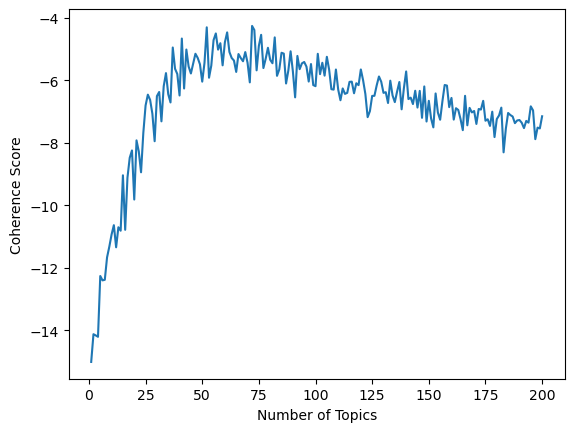

In [47]:
import matplotlib.pyplot as plt

num_topics = [i+1 for i in range(len(scores))]
                                
_=plt.plot(num_topics, scores)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
# according to the c_v measure, 16 topics looks like a good choice
# let's see what those topics look like

num_tops = max_topics
models[num_tops - 1].print_topics(num_words = 5)

## Topic Visualization of our topic models

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(models[num_tops - 1], corpus, dictionary)
pyLDAvis.display(lda_display)

## Have a look at the most frequent words throughout our topics

In [99]:
import re

def count_words(tuple_data):
    word_count = {}

    for tup in tuple_data:
        string_data = tup[1]
        
        words = re.findall(r'"([^"]*)"', string_data)
        
        for word in words:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    for word, count in sorted_word_count:
        if count > 1:
            print(f'{word}: {count}')

In [101]:
#result after the evalutation
eval_tuple = [(0, '0.013*"rudy" + 0.012*"machine" + 0.007*"robert" + 0.007*"ban" + 0.006*"fantastic" + 0.006*"star" + 0.006*"senator"'), (1, '0.012*"laughter" + 0.010*"iowa" + 0.008*"yeah" + 0.008*"wisconsin" + 0.008*"buy" + 0.007*"worth" + 0.007*"stupid"'), (2, '0.011*"bishop" + 0.011*"tuition" + 0.008*"remark" + 0.008*"machine" + 0.007*"television" + 0.006*"interview" + 0.006*"ban"'), (3, '0.009*"university" + 0.008*"narrative" + 0.006*"angeles" + 0.006*"patient" + 0.006*"los" + 0.006*"addiction" + 0.005*"legal"'), (4, '0.020*"laughter" + 0.010*"apologize" + 0.007*"jamiel" + 0.006*"evangelical" + 0.006*"johnson" + 0.005*"hostage" + 0.005*"humiliation"'), (5, '0.010*"evangelical" + 0.010*"estate" + 0.009*"putin" + 0.008*"colorado" + 0.008*"veterans" + 0.008*"laughter" + 0.007*"convention"'), (6, '0.010*"jewish" + 0.009*"table" + 0.007*"deduction" + 0.007*"sponsor" + 0.007*"team" + 0.006*"net" + 0.006*"ignore"')]
count_words(eval_tuple)

laughter: 3
machine: 2
ban: 2
evangelical: 2


In [102]:
#u_mass, 15 max topics, 50 iterations, 15 topics
tuple0 = [(0, '0.034*"apologize" + 0.013*"army" + 0.009*"laughter" + 0.008*"aircraft" + 0.008*"bigotry" + 0.008*"hostage" + 0.008*"color"'), (1, '0.010*"putin" + 0.008*"earth" + 0.007*"oppressive" + 0.007*"jewish" + 0.006*"communism" + 0.006*"extreme" + 0.006*"ban"'), (2, '0.012*"addiction" + 0.009*"buy" + 0.009*"patient" + 0.008*"overdose" + 0.007*"suppose" + 0.007*"yeah" + 0.007*"heroin"'), (3, '0.045*"laughter" + 0.010*"university" + 0.008*"net" + 0.008*"christian" + 0.008*"johnson" + 0.008*"evangelical" + 0.007*"christians"'), (4, '0.015*"tuition" + 0.013*"legal" + 0.011*"mental" + 0.010*"interview" + 0.010*"veterans" + 0.010*"deadly" + 0.009*"deliberate"'), (5, '0.012*"tuition" + 0.009*"ignore" + 0.008*"veterans" + 0.008*"angeles" + 0.008*"los" + 0.007*"trust" + 0.007*"machine"'), (6, '0.014*"laughter" + 0.012*"agency" + 0.010*"sensitive" + 0.010*"critical" + 0.010*"team" + 0.008*"offense" + 0.008*"necessary"'), (7, '0.010*"evangelical" + 0.009*"ban" + 0.008*"johnson" + 0.008*"rudy" + 0.007*"consequence" + 0.006*"stupidity" + 0.006*"buy"'), (8, '0.015*"laughter" + 0.009*"putin" + 0.008*"yeah" + 0.008*"guess" + 0.008*"ban" + 0.007*"colorado" + 0.007*"might"'), (9, '0.014*"army" + 0.013*"capability" + 0.010*"passage" + 0.010*"internet" + 0.009*"active" + 0.008*"putin" + 0.008*"combat"'), (10, '0.011*"venezuela" + 0.009*"machine" + 0.008*"humiliation" + 0.008*"jewish" + 0.008*"enact" + 0.006*"rudy" + 0.006*"solidarity"'), (11, '0.014*"crazy" + 0.014*"mall" + 0.013*"october" + 0.008*"aide" + 0.008*"overdose" + 0.008*"playing" + 0.008*"motorola"'), (12, '0.010*"university" + 0.010*"iowa" + 0.008*"phrase" + 0.008*"offshore" + 0.008*"ban" + 0.007*"commerce" + 0.007*"drink"'), (13, '0.016*"estate" + 0.011*"machine" + 0.009*"colorado" + 0.008*"television" + 0.007*"comeback" + 0.007*"putin" + 0.006*"yeah"'), (14, '0.010*"veterans" + 0.009*"ignore" + 0.009*"rebuilding" + 0.009*"mental" + 0.007*"presence" + 0.006*"affair" + 0.006*"deduction"')]
count_words(tuple0)

laughter: 4
putin: 4
ban: 4
yeah: 3
veterans: 3
machine: 3
army: 2
jewish: 2
buy: 2
overdose: 2
university: 2
johnson: 2
evangelical: 2
tuition: 2
mental: 2
ignore: 2
rudy: 2
colorado: 2


In [103]:
#u_mass, 15 max topics, 100 iterations, 15 topics
tuple1 = [(0, '0.018*"laughter" + 0.016*"capability" + 0.013*"sponsor" + 0.013*"army" + 0.013*"oppress" + 0.013*"avoid" + 0.010*"combat"'), (1, '0.016*"offshore" + 0.015*"remark" + 0.014*"veterans" + 0.013*"mental" + 0.012*"association" + 0.010*"carpenter" + 0.009*"comfortable"'), (2, '0.031*"apologize" + 0.011*"please" + 0.010*"jewish" + 0.010*"worth" + 0.010*"drink" + 0.010*"laura" + 0.009*"wto"'), (3, '0.041*"laughter" + 0.019*"evangelical" + 0.017*"johnson" + 0.009*"penny" + 0.008*"exempt" + 0.008*"primary" + 0.008*"balance"'), (4, '0.016*"addiction" + 0.014*"laughter" + 0.011*"patient" + 0.009*"putin" + 0.008*"internet" + 0.008*"overdose" + 0.008*"legal"'), (5, '0.017*"bishop" + 0.014*"estate" + 0.012*"television" + 0.011*"yeah" + 0.010*"colorado" + 0.010*"putin" + 0.009*"clue"'), (6, '0.014*"iowa" + 0.011*"farmer" + 0.009*"interview" + 0.008*"attitude" + 0.008*"temperament" + 0.007*"raid" + 0.007*"gruber"'), (7, '0.026*"university" + 0.015*"endowment" + 0.012*"conversation" + 0.012*"drink" + 0.012*"venezuela" + 0.012*"space" + 0.012*"opioid"'), (8, '0.023*"machine" + 0.011*"team" + 0.011*"determine" + 0.010*"ban" + 0.010*"agency" + 0.008*"discredit" + 0.007*"california"'), (9, '0.016*"rudy" + 0.011*"extreme" + 0.011*"necessary" + 0.011*"robert" + 0.010*"screening" + 0.010*"communism" + 0.010*"iowa"'), (10, '0.008*"opposition" + 0.008*"angeles" + 0.008*"estate" + 0.008*"convention" + 0.008*"colorado" + 0.007*"pulpit" + 0.007*"los"'), (11, '0.014*"intellectual" + 0.013*"team" + 0.011*"institute" + 0.011*"wisconsin" + 0.011*"deduction" + 0.010*"ban" + 0.010*"decline"'), (12, '0.012*"buy" + 0.008*"humiliation" + 0.008*"veterans" + 0.008*"television" + 0.007*"putin" + 0.007*"suppose" + 0.007*"yeah"'), (13, '0.026*"tuition" + 0.017*"jewish" + 0.013*"putin" + 0.012*"table" + 0.010*"machine" + 0.010*"university" + 0.010*"endowment"'), (14, '0.014*"evangelical" + 0.012*"burden" + 0.012*"september" + 0.012*"ability" + 0.012*"correct" + 0.012*"ban" + 0.012*"earth"')]
count_words(tuple1)

putin: 4
laughter: 3
ban: 3
veterans: 2
jewish: 2
drink: 2
evangelical: 2
estate: 2
television: 2
yeah: 2
colorado: 2
iowa: 2
university: 2
endowment: 2
machine: 2
team: 2


In [104]:
#u_mass, 20 max topics, 50 iterations, 100 topics
tuple2 = [(99, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (67, '0.035*"rebuilding" + 0.022*"creation" + 0.019*"thinking" + 0.019*"blighted" + 0.018*"presence" + 0.017*"jewish" + 0.016*"charlotte"'), (73, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (33, '0.020*"extreme" + 0.015*"germany" + 0.014*"screening" + 0.013*"communism" + 0.013*"interview" + 0.013*"necessary" + 0.013*"evil"'), (71, '0.032*"evangelical" + 0.026*"johnson" + 0.026*"machine" + 0.024*"balance" + 0.020*"penny" + 0.014*"primary" + 0.013*"consequence"'), (48, '0.017*"october" + 0.016*"crazy" + 0.016*"custody" + 0.015*"california" + 0.015*"mall" + 0.010*"francisco" + 0.010*"beijing"'), (13, '0.058*"deduct" + 0.058*"net" + 0.058*"deduction" + 0.039*"cap" + 0.039*"innovative" + 0.020*"adventure" + 0.020*"depend"'), (19, '0.003*"critical" + 0.003*"team" + 0.003*"agency" + 0.003*"sensitive" + 0.003*"offense" + 0.003*"identity" + 0.003*"necessary"'), (70, '0.050*"machine" + 0.018*"putin" + 0.018*"television" + 0.016*"determine" + 0.015*"magazine" + 0.015*"civilization" + 0.014*"discredit"'), (96, '0.021*"october" + 0.018*"custody" + 0.015*"mall" + 0.015*"california" + 0.015*"crazy" + 0.010*"ronnebeck" + 0.010*"earl"'), (92, '0.030*"offshore" + 0.020*"comfortable" + 0.016*"ban" + 0.016*"export" + 0.016*"revenue" + 0.015*"environmental" + 0.015*"association"'), (64, '0.033*"stupid" + 0.029*"worth" + 0.028*"net" + 0.026*"site" + 0.023*"asset" + 0.022*"cheerleader" + 0.022*"yeah"'), (53, '0.090*"legal" + 0.031*"decay" + 0.031*"heed" + 0.030*"deadly" + 0.030*"golf" + 0.030*"reappointment" + 0.030*"corrosive"'), (47, '0.060*"agency" + 0.045*"sensitive" + 0.045*"critical" + 0.044*"team" + 0.031*"identity" + 0.030*"necessary" + 0.030*"offense"'), (3, '0.031*"humiliation" + 0.031*"enact" + 0.020*"space" + 0.017*"venezuela" + 0.014*"solidarity" + 0.014*"procedure" + 0.014*"guide"'), (84, '0.006*"invasion" + 0.005*"extreme" + 0.004*"evil" + 0.004*"necessary" + 0.004*"screening" + 0.004*"germany" + 0.004*"communism"'), (58, '0.034*"evangelical" + 0.031*"johnson" + 0.028*"balance" + 0.027*"consequence" + 0.026*"penny" + 0.020*"primary" + 0.017*"display"'), (26, '0.017*"interview" + 0.017*"screening" + 0.015*"communism" + 0.015*"extreme" + 0.014*"necessary" + 0.014*"invasion" + 0.013*"germany"'), (16, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (65, '0.007*"intervention" + 0.006*"buy" + 0.006*"speaking" + 0.005*"suppose" + 0.005*"specific" + 0.004*"sexual" + 0.004*"heartache"')]
count_words(tuple2)

necessary: 5
reappointment: 4
pretend: 3
organize: 3
willful: 3
tarmac: 3
adult: 3
participation: 3
extreme: 3
germany: 3
screening: 3
communism: 3
interview: 2
evil: 2
evangelical: 2
johnson: 2
machine: 2
balance: 2
penny: 2
primary: 2
consequence: 2
october: 2
crazy: 2
custody: 2
california: 2
mall: 2
net: 2
critical: 2
team: 2
agency: 2
sensitive: 2
offense: 2
identity: 2
invasion: 2


In [105]:
#u_mass, 20 max topics, 50 iterations, 100 topics
tuple3 = [(70, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (66, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (62, '0.043*"university" + 0.034*"endowment" + 0.018*"tuition" + 0.018*"space" + 0.017*"narrative" + 0.016*"conversation" + 0.016*"opioid"'), (53, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (20, '0.075*"university" + 0.039*"tuition" + 0.034*"endowment" + 0.025*"drink" + 0.025*"opioid" + 0.025*"conversation" + 0.024*"narrative"'), (90, '0.019*"intellectual" + 0.013*"deduction" + 0.011*"team" + 0.011*"decline" + 0.011*"drink" + 0.010*"cap" + 0.009*"vast"'), (99, '0.019*"convention" + 0.015*"lawlessness" + 0.015*"dallas" + 0.015*"wake" + 0.014*"compare" + 0.014*"pulpit" + 0.014*"stable"'), (60, '0.012*"putin" + 0.008*"yeah" + 0.008*"television" + 0.007*"buy" + 0.006*"russian" + 0.006*"convention" + 0.005*"popular"'), (49, '0.038*"veterans" + 0.032*"mental" + 0.022*"los" + 0.022*"angeles" + 0.022*"interview" + 0.022*"personnel" + 0.016*"discipline"'), (64, '0.036*"capability" + 0.023*"army" + 0.017*"modernize" + 0.016*"combat" + 0.015*"ballistic" + 0.015*"active" + 0.015*"team"'), (73, '0.021*"vision" + 0.020*"western" + 0.016*"direction" + 0.016*"instance" + 0.015*"intervention" + 0.012*"table" + 0.012*"relation"'), (52, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (41, '0.027*"raid" + 0.024*"aide" + 0.017*"fraction" + 0.016*"wipe" + 0.016*"platform" + 0.016*"advise" + 0.016*"bishop"'), (30, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (32, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (16, '0.041*"jewish" + 0.026*"table" + 0.017*"behavior" + 0.016*"veto" + 0.016*"stab" + 0.015*"crazy" + 0.014*"mall"'), (12, '0.045*"deduction" + 0.040*"deduct" + 0.040*"net" + 0.027*"cap" + 0.026*"innovative" + 0.018*"incentive" + 0.014*"depend"'), (44, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (79, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (15, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"')]
count_words(tuple3)

pretend: 9
organize: 9
willful: 9
tarmac: 9
reappointment: 9
adult: 9
participation: 9
university: 2
endowment: 2
tuition: 2
narrative: 2
conversation: 2
opioid: 2
drink: 2
deduction: 2
team: 2
cap: 2
convention: 2
table: 2


In [106]:
#u_mass, 100 max topics, 100 iterations, 100 topics
tuple4 = [(26, '0.053*"ban" + 0.030*"venezuela" + 0.023*"wisconsin" + 0.018*"conspiracy" + 0.015*"classify" + 0.015*"ethic" + 0.015*"stagnation"'), (48, '0.041*"trust" + 0.037*"veterans" + 0.022*"female" + 0.022*"apologize" + 0.022*"investigate" + 0.022*"scalia" + 0.021*"selfless"'), (53, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (49, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (45, '0.069*"rudy" + 0.048*"fantastic" + 0.040*"ben" + 0.035*"robert" + 0.034*"jeff" + 0.026*"star" + 0.024*"sister"'), (69, '0.034*"veterans" + 0.026*"trust" + 0.019*"hemisphere" + 0.019*"procedure" + 0.018*"marine" + 0.018*"aggression" + 0.018*"importance"'), (88, '0.036*"site" + 0.034*"worth" + 0.033*"net" + 0.028*"stupid" + 0.028*"cheerleader" + 0.026*"asset" + 0.025*"yeah"'), (93, '0.032*"capability" + 0.023*"army" + 0.014*"combat" + 0.014*"offshore" + 0.014*"us" + 0.012*"revenue" + 0.012*"active"'), (76, '0.047*"passage" + 0.047*"internet" + 0.032*"export" + 0.032*"drink" + 0.020*"mess" + 0.017*"terry" + 0.016*"impact"'), (30, '0.104*"laughter" + 0.021*"christians" + 0.018*"johnson" + 0.015*"christian" + 0.014*"jon" + 0.012*"evangelical" + 0.012*"temperament"'), (90, '0.030*"iowa" + 0.020*"endowment" + 0.020*"conversation" + 0.020*"brink" + 0.020*"electricity" + 0.020*"university" + 0.020*"pavement"'), (23, '0.030*"veterans" + 0.029*"mendoza" + 0.024*"mental" + 0.019*"temperament" + 0.018*"earth" + 0.018*"oppressive" + 0.015*"telecom"'), (63, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (7, '0.062*"remark" + 0.041*"carpenter" + 0.041*"contrast" + 0.021*"russian" + 0.021*"afternoon" + 0.021*"negative" + 0.021*"being"'), (21, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (78, '0.059*"deduction" + 0.051*"net" + 0.050*"deduct" + 0.035*"cap" + 0.030*"innovative" + 0.020*"grateful" + 0.020*"immediate"'), (47, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (35, '0.026*"approval" + 0.026*"import" + 0.026*"addiction" + 0.026*"goldman" + 0.026*"germany" + 0.026*"opioid" + 0.026*"allegation"'), (2, '0.001*"pretend" + 0.001*"organize" + 0.001*"willful" + 0.001*"tarmac" + 0.001*"reappointment" + 0.001*"adult" + 0.001*"participation"'), (43, '0.048*"estate" + 0.048*"colorado" + 0.018*"mall" + 0.015*"developer" + 0.015*"comeback" + 0.015*"finish" + 0.014*"businessman"')]
count_words(tuple4)

pretend: 6
organize: 6
willful: 6
tarmac: 6
reappointment: 6
adult: 6
participation: 6
veterans: 3
trust: 2
net: 2
temperament: 2
